## The Dataset

EEG data sampled at 500Hz in 1000 trials of two conditions. 

In [1]:
# load libraries
import os
import scipy as sp
import numpy as np
from numpy import sqrt
from scipy.io import loadmat
import matplotlib.pyplot as plt

%matplotlib inline 

Load the data that we will work on. The data contains two mat files. The first file is a 1000 by 1000 matrix that corresponds to the two conditions ```(trials x time)```. That means, the first 500 columns (time points) belong to the 1st condition and the last 500 columns (time points) belong to the second condition. The second file is a 1 by 500 matrix that corresponds to the time axis. 

In [2]:
# Define paths:
root_dir = '/Users/christinadelta/Desktop/intro_to_eeg_analyses/'
mat_dir = os.path.join(root_dir, 'data', 'my_matfiles')

In [3]:
# define file-specific paths:
eegcond_dir = os.path.join(mat_dir, 'eeg_allcond.mat') # path for the eeg data file
eegtimes_dir = os.path.join(mat_dir, 'eeg_times.mat')  # path for the time-points file

# load the data files using the scipy.io.loadmat() function 
eeg_conditions = loadmat(eegcond_dir)['eeg_allcond'] # a 1000 x 1000 .m file
eeg_times = loadmat(eegtimes_dir)['eeg_times'][0] # a 1 x 500 .m file

# look at the data
print(eeg_conditions.shape)
print(eeg_times.shape)

(1000, 1000)
(500,)


The ```eeg_conditions``` file contains both conditions in a 1000 by 1000 matrix:
* columns 1:500 belong to condition A
* columns 501:1000 belong to condition B

Note that the ```eeg_times``` matrix corresponds to the recording of one second. It will be more clear when we plot it. 

Split the matrix in two different matrices. One containing the eeg condition A and the other containing the eeg condition B:

In [4]:
eeg_a = eeg_conditions[:,0:500] # the eeg data for condition one
eeg_b = eeg_conditions[:,500:1000] # the eeg data for condition 2

# look at their shape. If they are both: 1000 x 500 then everything is alright
eeg_a.shape
eeg_b.shape

(1000, 500)

The rows of the matrices correspond to the 1000 trials of this dataset. Let's compute the mean and SD of the signal across trials. For the sake of this example, we will only compute the descriptes for condition one:

In [5]:
# compute the average ERP 
trials = len(eeg_a)
mean_a = eeg_a.mean(0) # we added zero in parentheses to specify that we compute mean across x-axis/rows/trials
sd_a = eeg_a.std(0) # compute the sd across trials
se_a = sd_a / sqrt(trials) # compute standard error of the mean

Great! We computed the ERP for condition A. Now let's visualise. Plot the ERP for condition A and include confidence intervals (CI) as shade around the signal:

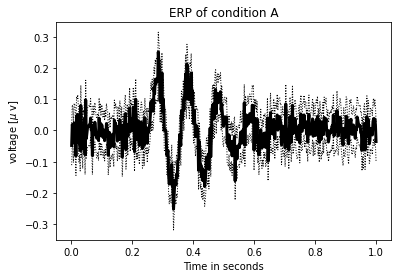

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(eeg_times, mean_a, 'k', lw=3) # ERP
plt.plot(eeg_times, mean_a + 2 * se_a, 'k:', lw=1) # upper CI
plt.plot(eeg_times, mean_a - 2 * se_a, 'k:', lw=1) # lower CI
plt.xlabel('Time in seconds')
plt.ylabel('voltage [$\mu$ v]')
plt.title('ERP of condition A')
plt.show()

# and save the plot:
save_file = os.path.join(root_dir, 'figures', f'ERP_condA.png')
plt.savefig(save_file, facecolor='w', edgecolor='w')

### The EEG signal 

The voltage recording that comes from the scalp's surface (electroencephalogram) provides very useful information abou the temporal dynamics of neural activity, at the level of milliseconds. One of the main reasons we run EEG analyses is to investigate the **neural oscillations** or **rhythmic activity** whci is observed in different frequencies: 

* **Delta activity is observed at 1-4Hz** and is  linked to a broad variety of perceptual, sensorimotor, and cognitive operations.  Delta rhythms are very commonly associated with the deep stage 3 of NREM sleep, also known as slow-wave sleep (SWS), and aid in characterizing the depth of sleep.
* **Theta activity is observed at 5-8Hz** and underlies various aspects of cognition and behavior, including learning, memory, and spatial navigation in many animals. There are two types of theta activity: *the hippocampal theta rhythm*, a strong oscillation that can be observed in the hippocampus and other brain structures and the *cortical theta rhythm*, low-frequency components of scalp EEG, usually recorded from humans. 
* **Alpha activity is observed at 8-12Hz**, likely originating from the synchronous and coherent (in phase or constructive) electrical activity of thalamic pacemaker cells in humans. Alpha activity is the most studied one and is thought to have at least two different forms, which may have different functions in the wake-sleep cycle:  
    * The most widely researched is during the relaxed mental state, where the subject is at rest with eyes closed, but is not tired or asleep. This alpha activity is centered in the occipital lobe, although there has been speculation that it has a thalamic origin.
    * The second form of alpha wave activity is during REM sleep. As opposed to the awake form of alpha activity, this form is located in a frontal-central location in the brain. The purpose of alpha activity during REM sleep is not yet fully understood. Currently, there are arguments that alpha patterns are a normal part of REM sleep, and for the notion that it indicates a semi-arousal period.
* **Beta activity is observed at 13-30Hz**, they are associated with normal waking consciousness and can be split into three sections:
    * Low Beta Waves (12.5–16 Hz) or **Beta 1 power**
    * Beta Waves (16.5–20 Hz) or **Beta 2 power**
    * High Beta Waves (20.5–29 Hz) or **Beta 3 power**
* **Gamma activity is observed at 30-200Hz**. In humans, a gamma Rhythm is a pattern of neural oscillation with a frequency between 25 and 140 Hz, with the 40-Hz point being of particular interest. Gamma rhythms are correlated with large scale brain network activity and cognitive phenomena such as working memory, attention, and perceptual grouping.

### Now back to the dataset:

we can use the ```whos``` command to get more information about our variables 

In the experiments of this EEG recording participants were presented with two squares of different colour. The were asked to press space whenever the square was red and do nothing when the square was green. Note that the colour/response correspondence was counterbalanced across participants. 

Here, condition A corresponds to the **response emitted** trials and condition B corresponds to the **response omitted** trials.

The dataset contains 1000 trials (rows of the matrices) for each condition at 500 time points (columns of the matrices). 



In [7]:
whos

Variable         Type        Data/Info
--------------------------------------
eeg_a            ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
eeg_b            ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
eeg_conditions   ndarray     1000x1000: 1000000 elems, type `float64`, 8000000 bytes (7.62939453125 Mb)
eeg_times        ndarray     500: 500 elems, type `float64`, 4000 bytes
eegcond_dir      str         /Users/christinadelta/Des<...>_matfiles/eeg_allcond.mat
eegtimes_dir     str         /Users/christinadelta/Des<...>my_matfiles/eeg_times.mat
loadmat          function    <function loadmat at 0x118f65560>
mat_dir          str         /Users/christinadelta/Des<...>analyses/data/my_matfiles
mean_a           ndarray     500: 500 elems, type `float64`, 4000 bytes
np               module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os               module      <module 'os' from '/usr/l<...>3.7/li

To look at the total number of trials we can either use the ```.shape``` function or the ```len()``` function

In [8]:
# the len function
nb_trials = len(eeg_a) 
print(nb_trials)

# or 
# the shape function
nb_trials = eeg_a.shape[0]
print(nb_trials)

1000
1000


The shape function of an array returns a tuple with the size of each dimension. By adding [0] we explicitely ask for the rows dimension, that is the first value of the tuple. 

Another useful property of python is that we can assign two variables at once:

In [9]:
nb_trials, nb_tps = eeg_a.shape
print(nb_trials, nb_tps)

1000 500


Do you understand why? If not, look [here](https://note.nkmk.me/en/python-tuple-list-unpack/) for a clear explanation. 

## Visual inspection of the data

As a first step before plotting and visually inspecting the signal we can check the values and look at the ranges of volatge. For example, let's take a look at the first few time-points of the first trial of condition A:

In [14]:
eeg_a[0,0:30]

array([-0.18590963,  0.44987601,  1.06070801, -0.47126525,  1.68669327,
        0.93822134,  0.22120704,  0.40549128,  0.87887967,  0.52369783,
       -2.35240678, -0.92434588,  0.7666718 , -0.464255  ,  0.06259532,
        1.51917029, -0.77640081,  0.81498874, -0.15813729, -0.61740252,
        0.20750639,  0.35943087, -1.21455008, -0.61671545, -0.0481362 ,
        0.31798269, -0.27745959,  0.04148398, -1.52257779,  1.31993666])

This type of inspection does not provide us any useful information about the behaviour of the data, so, normally, an experienced researcher would not really inspect the data this way. However, given that this is a beginner's introductory tutorial, taking a look at ranges of voltages throughout a trial is actually a good starting point. Here, we see values that range from -2.7 to 1.6. We also see flactuations in these values (both positive and negative). 

A plot would give us more information abou the data, so let's print the first trial:

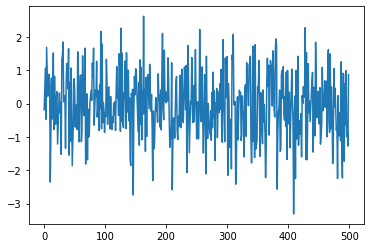

In [19]:
plt.plot(eeg_a[0]) # we want the entire trial one 
save_file = os.path.join(root_dir, 'figures', f'plot_cond1.png')
plt.savefig(save_file)

The x-axis corresponds to the timepoints or the columns of the data ranging from 0-500 (500 columns). The y-axis corresponds to the voltages (all the 500 values of the first row of ```eeg_a```). Even though protting data this way is way more useful than prenting the content of the variable (as we did above), it would be better to plot the voltages as a function of time. To do so, we need to use the ```eeg_times``` variable that has 500 values. This 500 values correspond to all the time points (tps) of one trial (an entire second). Loo at the block of code below:

In [23]:
print(len(eeg_times)) # length of the time variable
print(eeg_times[1] - eeg_times[0]) # check the sampling interval

# also print..
eeg_times[0] # the first tp
eeg_times[-1] # the last tp

500
0.002


1.0

We see that we have 500 time points that add up to **one second**. Now we can combine the two arrays (the ```eeg_times``` as the x-axis and the ```eeg_a``` as the y-axis) to plot the data.

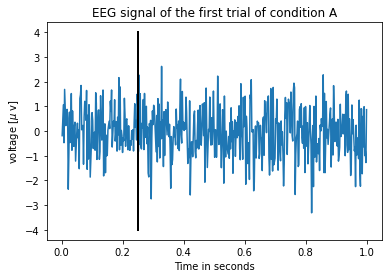

In [49]:
plt.plot(eeg_times, eeg_a[0]) # plot only the first trial of condition A
plt.xlabel('Time in seconds')
plt.ylabel('voltage [$\mu$ v]')
plt.title('EEG signal of the first trial of condition A')

# let's add a vertical line that indicated where the stimulus presentation ends
plt.plot([0.25, 0.25], [-4, 4], 'k', lw=2) # add a black line with thicknes=2

# save figure
save_file = os.path.join(root_dir, 'figures', f'plot_cond1_2.png')
plt.savefig(save_file)

We can make our figure even more descriptive by adding a gray half transparent rectangle at the interval of the stimulus presentation. This will make our block of code a little bit longer, and we will use more advanced ```matplotlib``` plotting commands, but play around with the code and look for more information [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html)

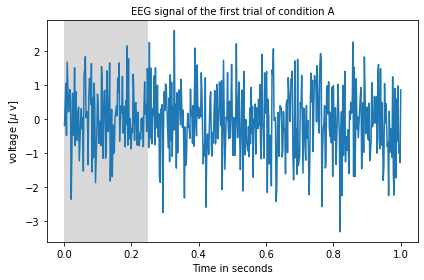

In [47]:
fig, ax = plt.subplots()
ax.plot(eeg_times, eeg_a[0])

ax.set_title('EEG signal of the first trial of condition A', fontsize=10)
ax.set_ylabel('voltage [$\mu$ v]')
ax.set_xlabel('Time in seconds')
ax.axvspan(0.0, 0.250, facecolor='0.5', alpha=0.3)

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Time in seconds', size=10)
plt.ylabel('voltage [$\mu$ v]', size=10)
plt.tight_layout()

# save the file 
save_file = os.path.join(root_dir, 'figures', f'plot_cond1_3.png')
plt.savefig(save_file)

The plot above gives a nice and easy to read summary of the first trial of condition A. We see that the data exhibit complicated activity. We also see that the presentation of the stimulus lasts for 300ms (gray transparent rect).

So far we have played around with the data from condition A. We can now plot the signal from the first trial of both conditions and compare them:

Text(0.5, 1.0, 'EEG signal of the first trial of conditions A and B')

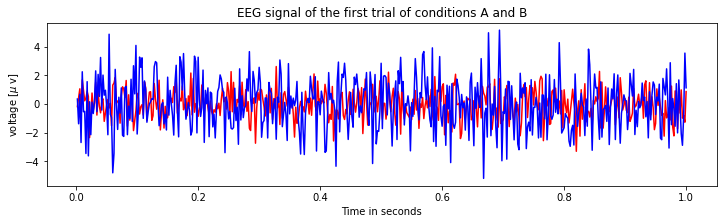

In [59]:
plt.figure(figsize=(12,3)) # resize the figure 
plt.plot(eeg_times, eeg_a[0], 'r') # plot the first trial of condition A in red
plt.plot(eeg_times, eeg_b[0], 'b') # plot the first trial of condition B in blue
plt.xlabel('Time in seconds')
plt.ylabel('voltage [$\mu$ v]')
plt.title('EEG signal of the first trial of conditions A and B')

Compare the voltage plots from conditions A & B from above. Are there any similarities? 

### Practise 

* The last figure we made (with signals from conditions A & B plotted together) is the simple version. Can you make a plot (with both signals in the same figure) and add a half transparent rectangle around the time interval of the stimulus presenattion? Look at how we plotted condition A for help.
* So far we have plotted only the first trial. Try plotting more trials and look at similarities and differences between trials

## Plotting the ERP 